In [2]:
"""


Initial tests



"""

'\n\n\nInitial tests\n\n\n\n'

In [3]:
import os
import zipfile
import requests
    
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib import cm

from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

import numpy as np
import geopandas as gp
import pandas as pd

import scipy

from pylab import figure

import shapely
import fiona

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
if os.path.isfile("air-con-climate-data-july-7-2015.xlsx"):
    filepath = "air-con-climate-data-july-7-2015.xlsx"
    print "loading from file"
else:
    filepath = "http://data.gov.au/dataset/9cb612b2-c303-4fb1-b87b-c987baa7e26b/resource/941dcd1b-a686-4455-9609-ecf6837d786e/download/air-con-climate-data-july-7-2015.xlsx"
    print "loading from the internet"

aircon_data = pd.read_excel(filepath)
print type(aircon_data)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [6]:
aircon_data.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours
0,800,130.8,-12.5,1,5377,0
1,801,130.8,-12.5,1,5377,0
2,804,130.8,-12.4,1,5377,0
3,810,130.9,-12.4,1,5377,0
4,811,130.9,-12.4,1,5377,0


In [7]:
aircon_data.columns

Index([u'Postcode', u'Longitude', u'Latitude', u'NatHERS Climate zone',
       u'Annual cooling hours', u'Annual heating hours'],
      dtype='object')

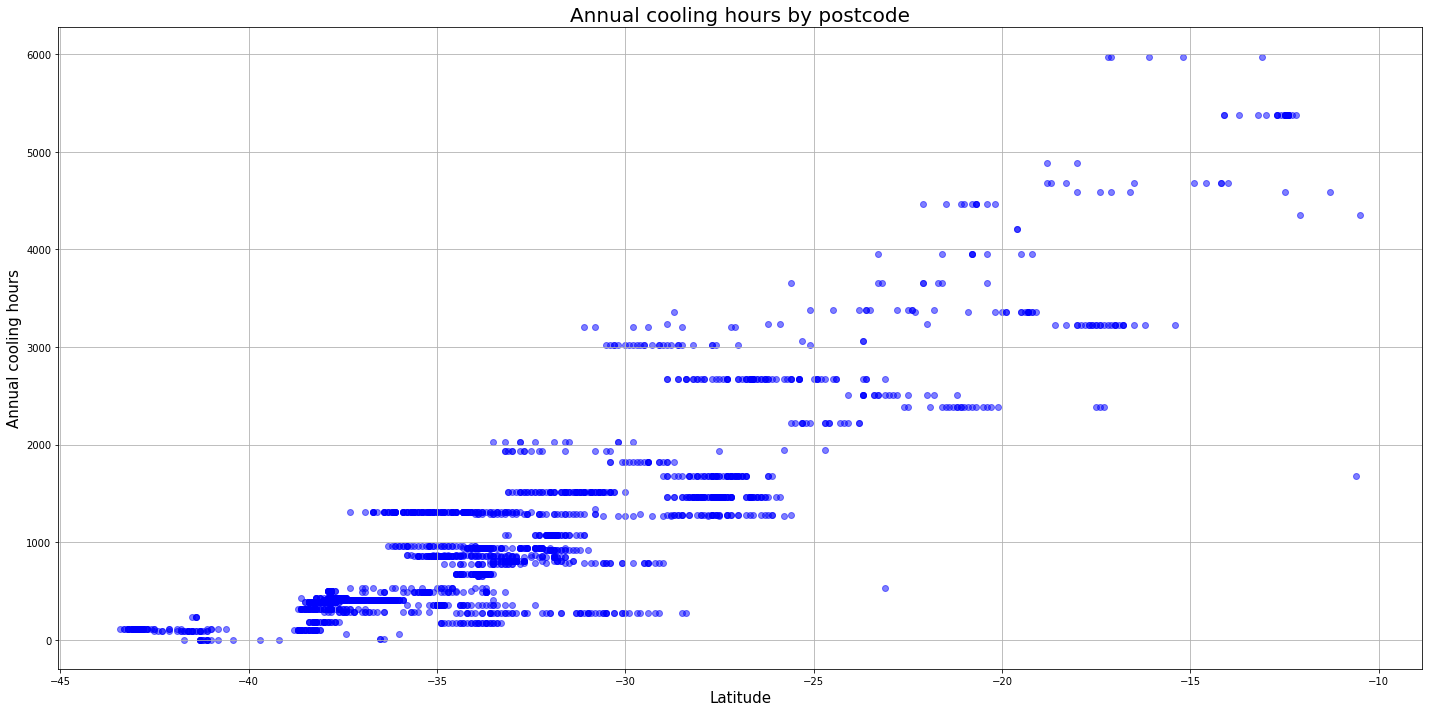

In [8]:
x=aircon_data["Latitude"]
y=aircon_data["Annual cooling hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="b", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual cooling hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


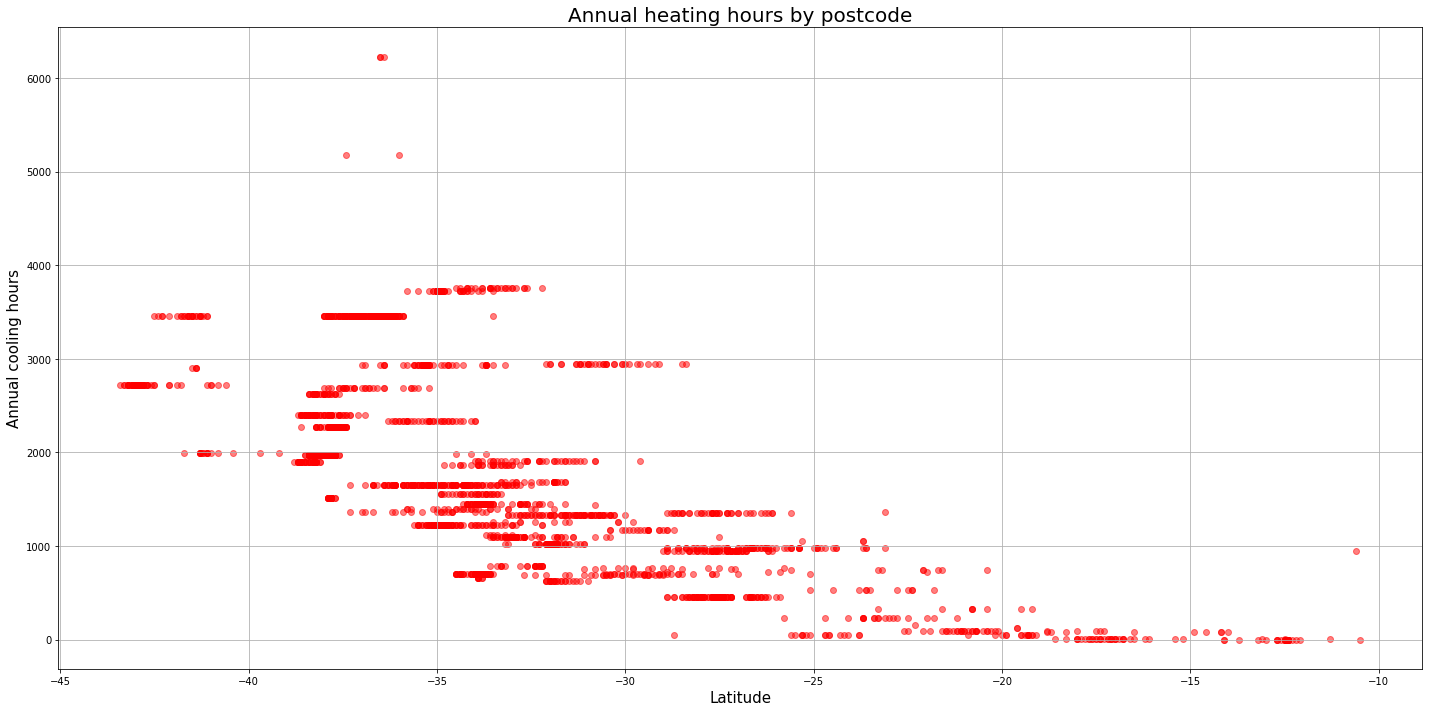

In [9]:
x=aircon_data["Latitude"]
y=aircon_data["Annual heating hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="r", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


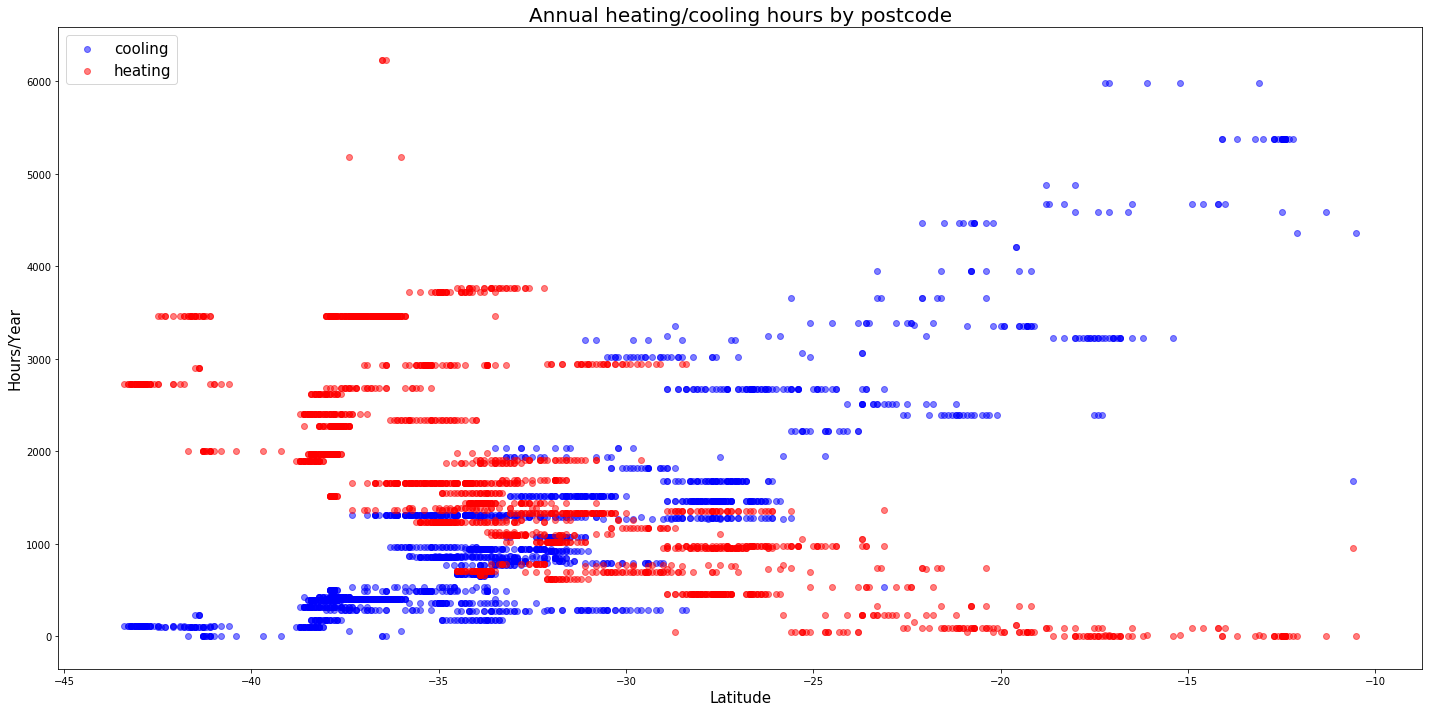

In [10]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size":15});
fig.tight_layout()



plt.show()


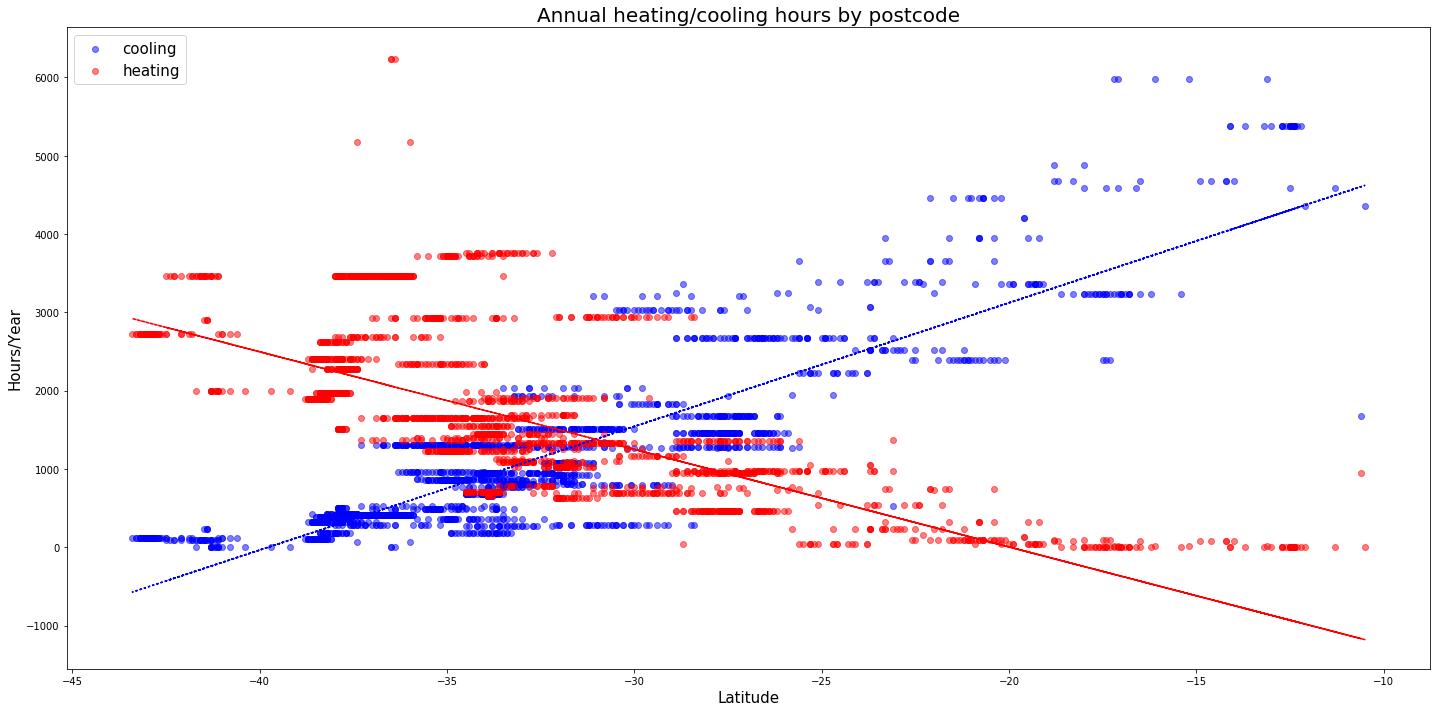

In [11]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size" : 15});

fig.tight_layout()


tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")
         



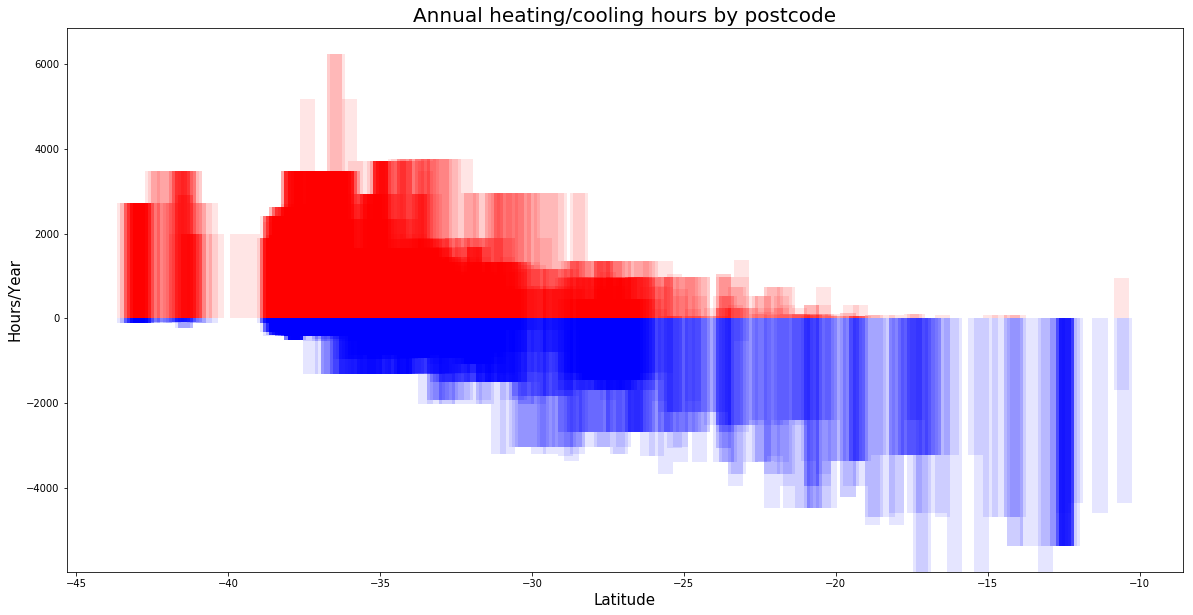

In [12]:
# Y = np.arange(len(aircon_data["Latitude"]))

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.bar(y, -aircon_data["Annual cooling hours"],  color = 'b', width = 0.5, alpha=0.1)
plt.bar(y, aircon_data["Annual heating hours"], color = 'r', width = 0.5, alpha=0.1)
plt.show()

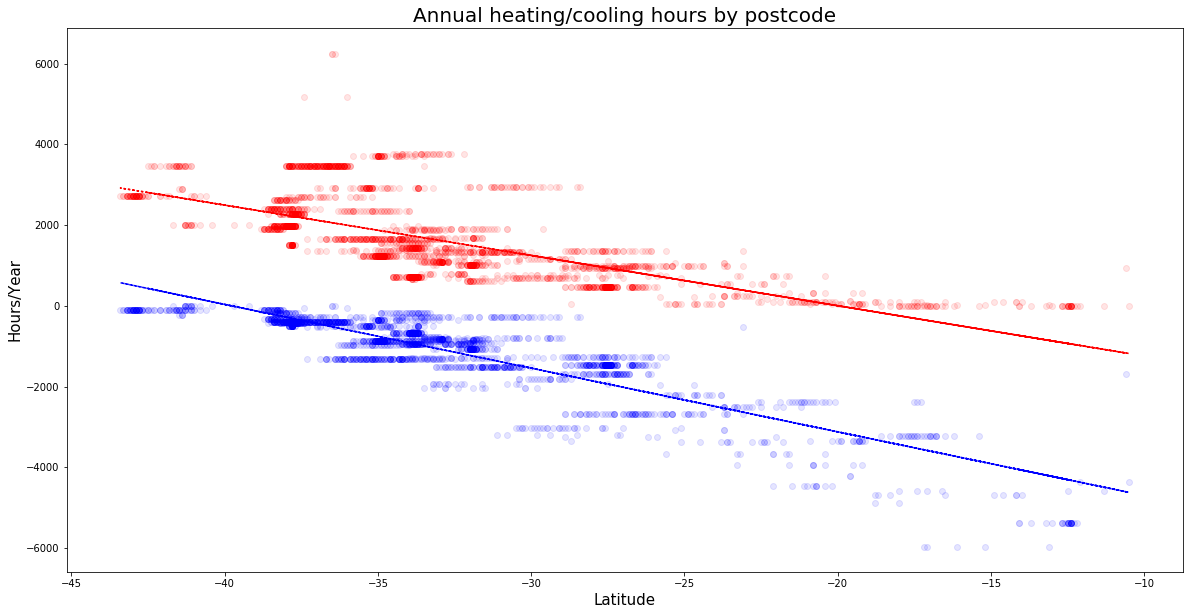

In [13]:
# Y = np.arange(len(aircon_data["Latitude"]))

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.scatter(y, -aircon_data["Annual cooling hours"],  color = 'b', alpha=0.1)
plt.scatter(y, aircon_data["Annual heating hours"], color = 'r', alpha=0.1)

tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(-tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")

plt.show()

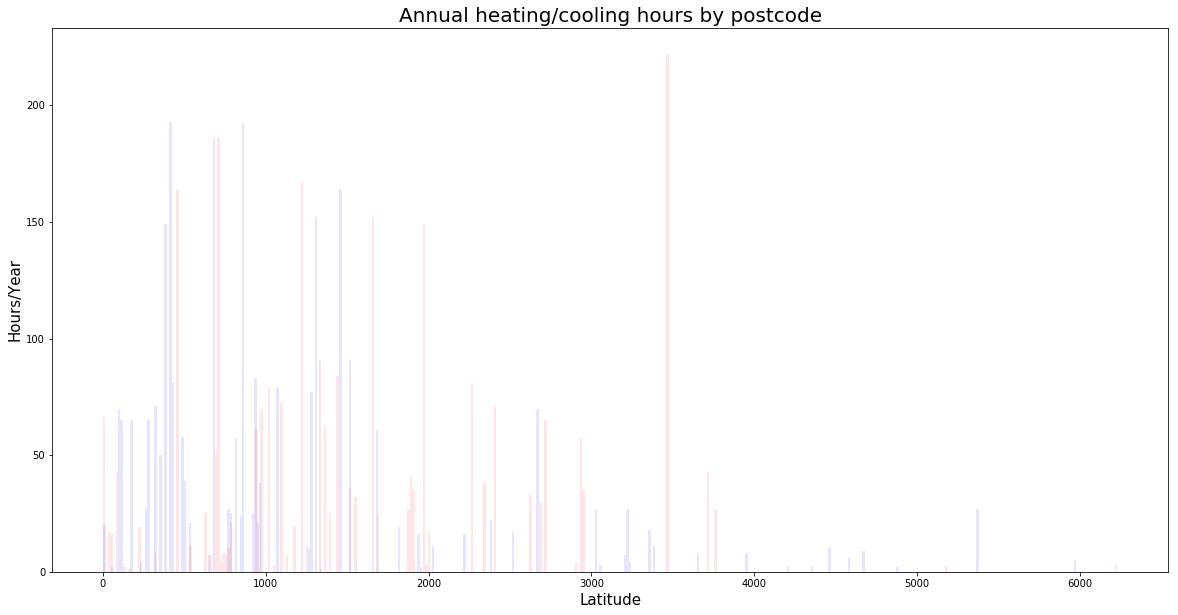

In [14]:
fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.hist( aircon_data["Annual cooling hours"], bins =400,  color = 'b', alpha=0.1)
plt.hist( aircon_data["Annual heating hours"], bins = 400, color = 'r', alpha=0.1)
plt.show()

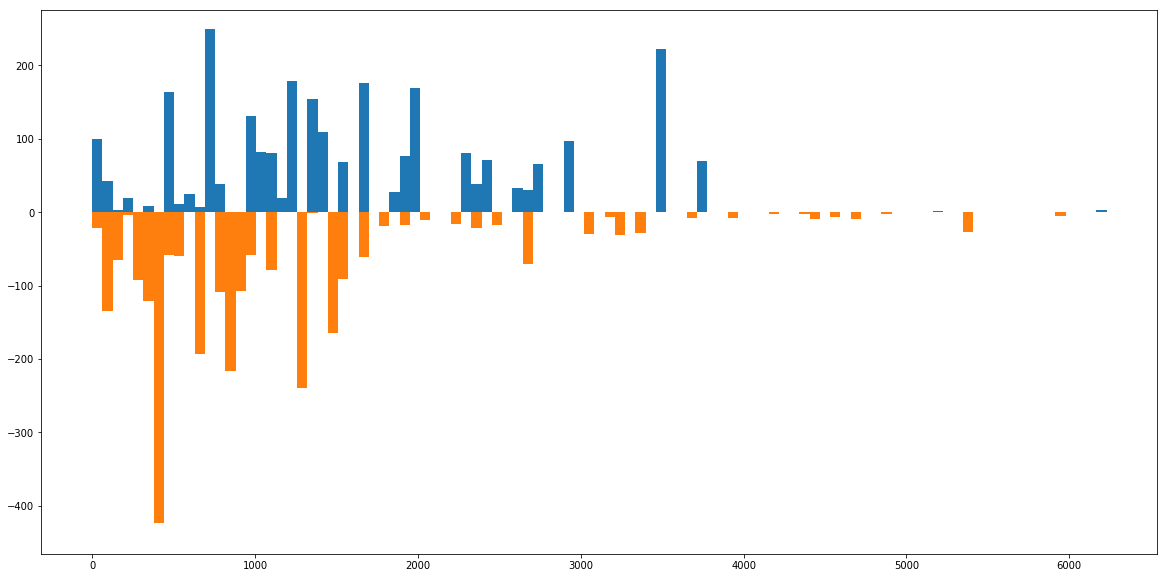

In [15]:
def bihist(y1, y2, nbins=10, h=None):
        '''
        Bihistogram.
        h is an axis handle. If not present, a new figure is created.
        '''
        if h is None: h = figure().add_subplot(111)
        xmin = scipy.floor(scipy.minimum(y1.min(), y2.min()))
        xmax = scipy.ceil(scipy.maximum(y1.max(), y2.max()))
        bins = scipy.linspace(xmin, xmax, nbins)
        n1, bins1, patch1 = h.hist(y1, bins)
        n2, bins2, patch2 = h.hist(y2, bins)
        # set ymax:
        ymax = 0
        for i in patch1:
                height = i.get_height()
                if height > ymax: ymax = height
        # invert second histogram and set ymin:
        ymin = 0
        for i in patch2:
                height = i.get_height()
                height = -height
                i.set_height(height)
                if height < ymin: ymin = height
        h.set_ylim(ymin*1.1, ymax*1.1)          
        h.figure.canvas.draw()

bihist(aircon_data["Annual heating hours"], aircon_data["Annual cooling hours"], nbins = 100) 

In [16]:
# Y = np.arange(len(aircon_data["Latitude"]))
sorted_aircon = aircon_data.sort_values("Latitude", axis = 0, ascending = True)
sorted_aircon.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours
1045,7150,147.1,-43.4,26,113,2723
1040,7112,147.1,-43.3,26,113,2723
1043,7117,147.0,-43.3,26,113,2723
1039,7109,146.5,-43.2,26,113,2723
1042,7116,146.9,-43.2,26,113,2723


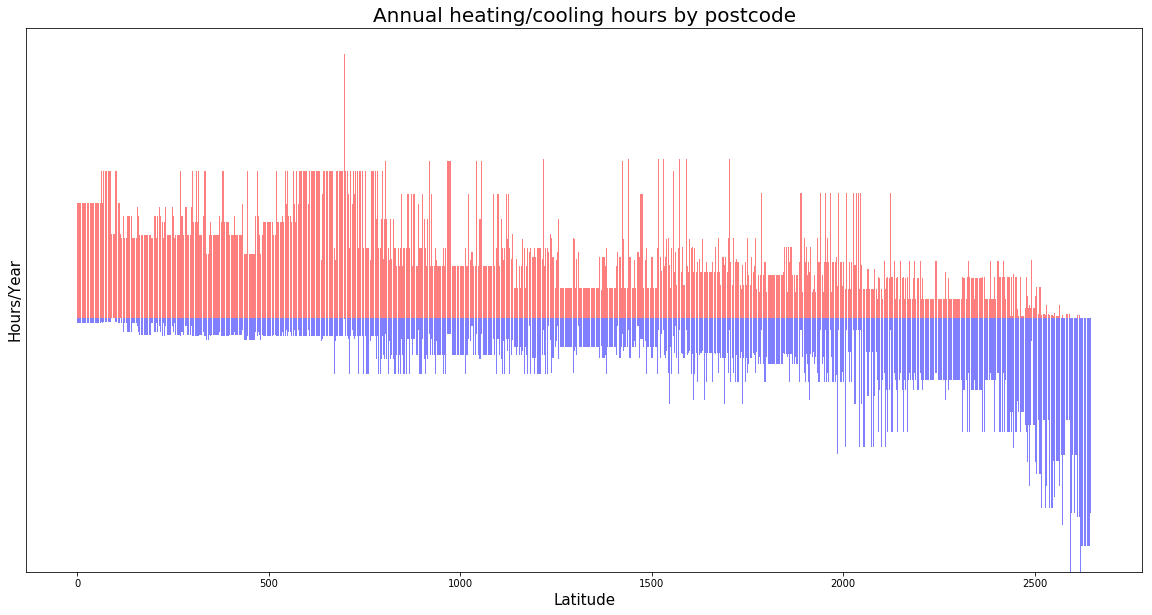

In [17]:
fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)


x = sorted_aircon["Latitude"]


maxH = max(sorted_aircon["Annual heating hours"])
maxC = max(sorted_aircon["Annual cooling hours"])

yLabels = [maxC, "0", maxH]
yPos = [-maxC, "0", maxH]

xPos = np.arange(len(x))
xPos = [i for i in xPos]
# xPos10 = len(x)/10
# xLabels = sorted_aircon["Latitude"][xPos10]
# xPos10 = np.arange(xPos10)



# xLabels = map(sorted_aircon["Latitude"]()

# x = [i for i in aircon_data["Latitude"]]
# x = [i for i in range(len(y))]
# x = [i for i in range(len(y))]

plt.yticks(yPos, yLabels)
# plt.xticks(xPos10, xLabels)
plt.bar(xPos, -sorted_aircon["Annual cooling hours"],  color = 'b', alpha=0.5)
plt.bar(xPos, sorted_aircon["Annual heating hours"], color = 'r', alpha=0.5)
plt.show()

In [18]:
"3D tests bellow"

'3D tests bellow'

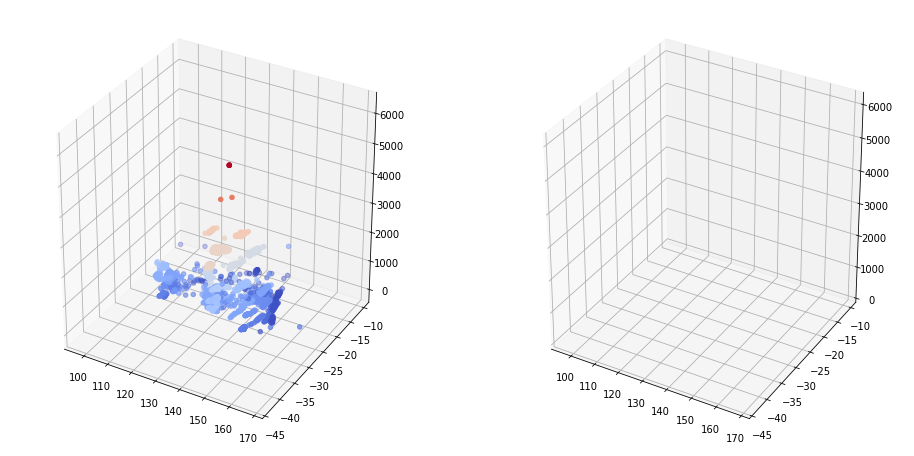

In [19]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = aircon_data["Longitude"]
Y = aircon_data["Latitude"]
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = aircon_data["Annual heating hours"]
# Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)
# X,Y = np.meshgrid(bx,by)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
# fig.colorbar(surf, shrink=0.5, aspect=10)
cmcw = plt.cm.get_cmap("coolwarm")
c = np.abs(Z)
ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# ax.plot_surface(X, Y, Z)


# #===============
# # Second subplot
# #===============
# # # set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # X, Y, Z = get_test_data(0.05)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
                       linewidth=0, antialiased=False)

plt.show()

In [20]:
"""



state tests bellow



"""

'\n\n\n\nstate tests bellow\n\n\n\n'

In [21]:
def setState (pc):
    states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return states[0]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return states[1]
    elif 3000 <= pc < 4000:
        return states[2]
    elif 4000 <= pc < 5000:
        return states[3]
    elif 5000 <= pc < 6000:
        return states[4]
    elif 6000 <= pc < 7000:
        return states[5]
    elif 7000 <= pc < 8000:
        return states[6] 
    elif 800 <= pc < 900:
        return states[7]
    else:
        pass


# print setState(2605)
# print setState(2000)
# print setState(3000)
# print setState(4000)
# print setState(5000)
print setState(6000)
print setState(7000)
print setState(800)

#  stateC = {"ACT" : ,"y", 
#               "NSW" : "c", 
#               "VIC" : "b", 
#               "QLD" : "m", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}



stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}


def setStateC (pc):
    stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return stateC["ACT"]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return stateC["NSW"]
    elif 3000 <= pc < 4000:
        return stateC["VIC"]
    elif 4000 <= pc < 5000:
        return stateC["QLD"]
    elif 5000 <= pc < 6000:
        return stateC["SA"]
    elif 6000 <= pc < 7000:
        return stateC["WA"]
    elif 7000 <= pc < 8000:
        return stateC["TAS"] 
    elif 800 <= pc < 900:
        return stateC["NT"]



print setStateC ("NSW")

# print stateC[setState(2605)]
# print stateC[setState(2000)]
# print stateC[setState(3000)]
# print stateC[setState(4000)]
# print stateC[setState(5000)]
# print stateC[setState(6000)]
# print stateC[setState(7000)]
# print stateC[setState(800)]

# def setStateC (s):
#     return stateC[s]

# print setStateC ("NSW")

# def setStateC (pc):
#     s = setState (pc)
# #     return stateC[s]

print setStateC (3444)
print setStateC (5444)
print setStateC (6444)
print setStateC (2444)
print setStateC (800)



WA
TAS
NT
None
blue
r
k
lightskyblue
orange


In [22]:
airdf = aircon_data

stateList = airdf["Postcode"].apply(setState)
airdf["State"] = stateList.values

colourList = airdf["Postcode"].apply(setStateC)
airdf["State colour"] = colourList.values
# print colourList


airdf.head()

# print airdf["State colour"]

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
0,800,130.8,-12.5,1,5377,0,NT,orange
1,801,130.8,-12.5,1,5377,0,NT,orange
2,804,130.8,-12.4,1,5377,0,NT,orange
3,810,130.9,-12.4,1,5377,0,NT,orange
4,811,130.9,-12.4,1,5377,0,NT,orange


In [23]:

# colourList = stateC[airdf["State"]]
# print colourList


# colourList = airdf["State"].apply(setStateC)
# print colourList

# airdf["State colour"] = colourList.values
# airdf.head()

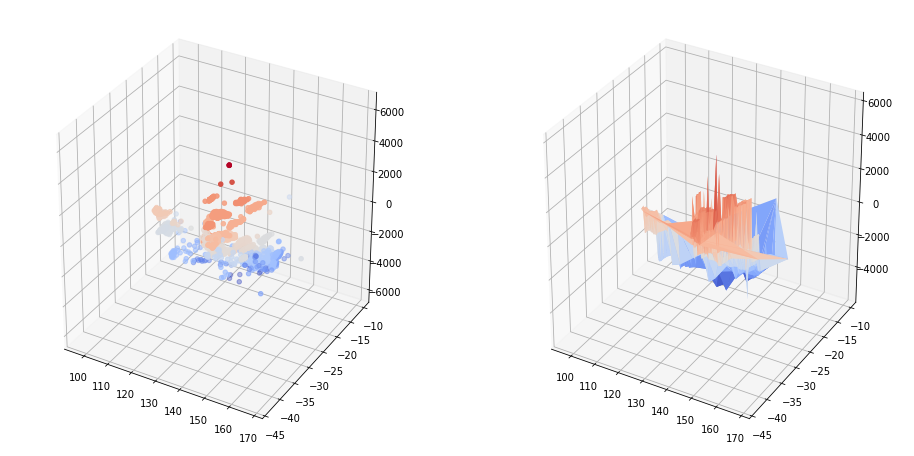

In [24]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# X = airdf["Longitude"][airdf["State"]=="NSW"]
# Y = airdf["Latitude"][airdf["State"]=="NSW"]
X = airdf["Longitude"]
Y = airdf["Latitude"]
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
# fig.colorbar(surf, shrink=0.5, aspect=10)
cmcw = plt.cm.get_cmap("coolwarm")
c = Z
ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# ax.plot_surface(X, Y, Z)


# #===============
# # Second subplot
# #===============
# # # set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # X, Y, Z = get_test_data(0.05)
# X,Y = np.meshgrid(X,Y)
# # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)

ax.plot_trisurf(X, Y, Z, cmap="coolwarm")


plt.show()

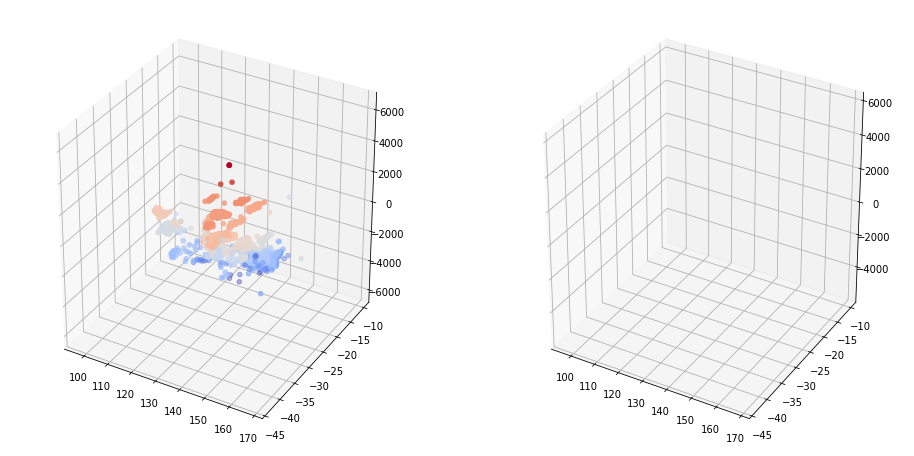

In [25]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# X = airdf["Longitude"][airdf["State"]=="NSW"]
# Y = airdf["Latitude"][airdf["State"]=="NSW"]
X = airdf["Longitude"]
Y = airdf["Latitude"]
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
# fig.colorbar(surf, shrink=0.5, aspect=10)
cmcw = plt.cm.get_cmap("coolwarm")
c = Z
ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# ax.plot_surface(X, Y, Z)


# #===============
# # Second subplot
# #===============
# # # set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # X, Y, Z = get_test_data(0.05)
# X,Y = np.meshgrid(X,Y)
# # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)

ax.plot_surface(X, Y, Z, cmap="coolwarm")


plt.show()

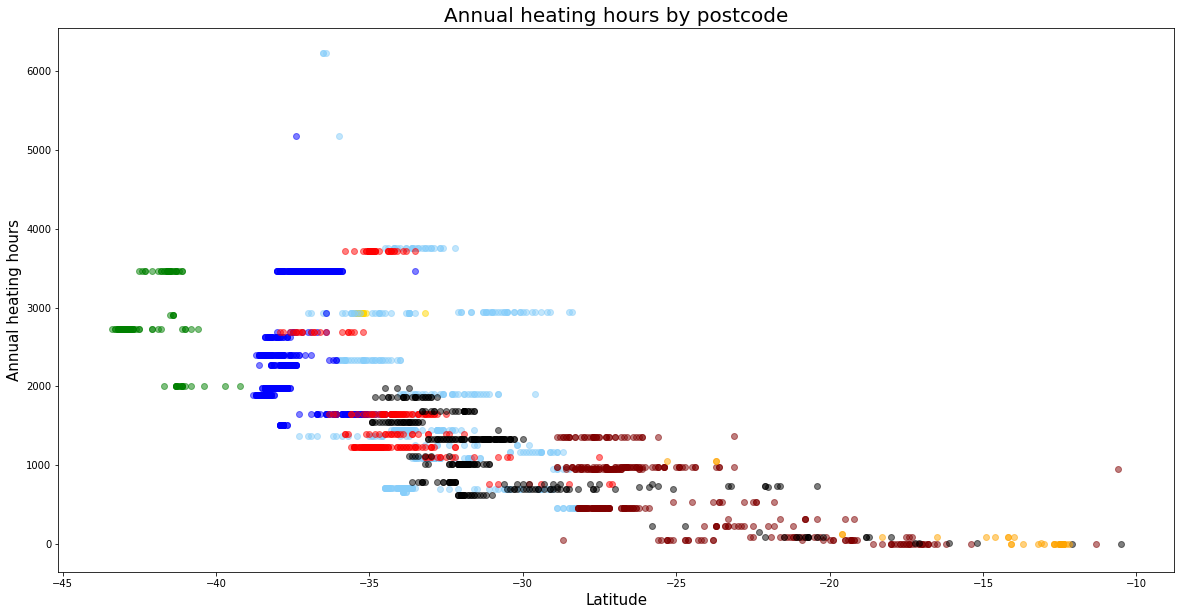

In [26]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
 

ax.set_ylabel("Annual heating hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

plt.show()

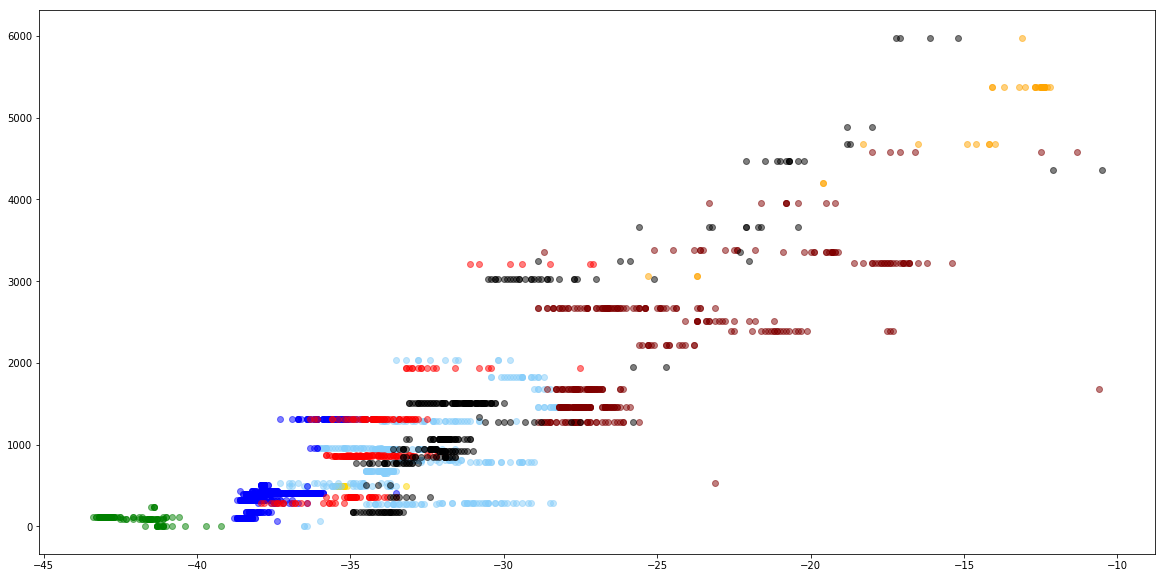

In [27]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
    
plt.show()

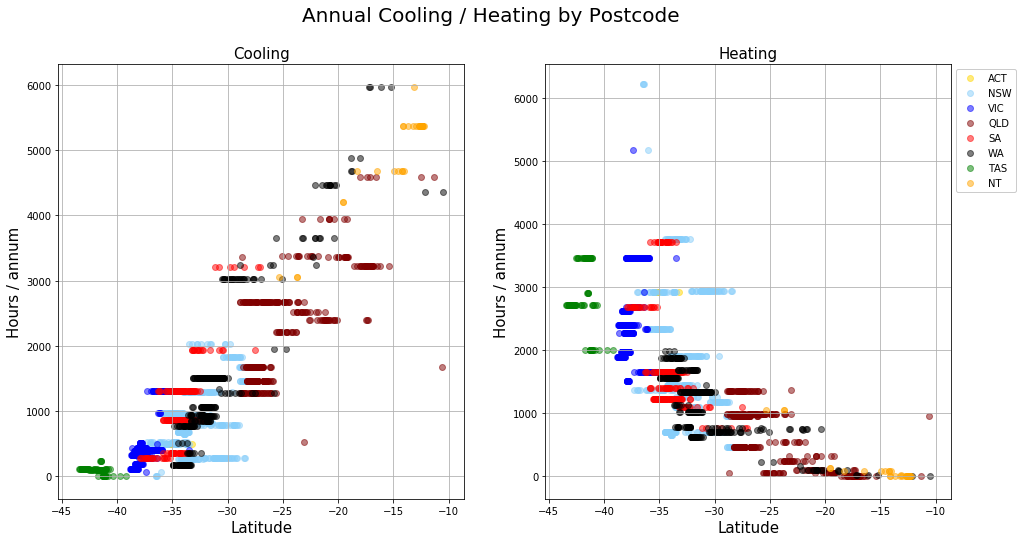

In [28]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Annual Cooling / Heating by Postcode", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],yc[state_vector==state], label = state, color=stateC[state], alpha = 0.5)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(x[state_vector==state],yh[state_vector==state], label = state, color=stateC[state], alpha = 0.5)


    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

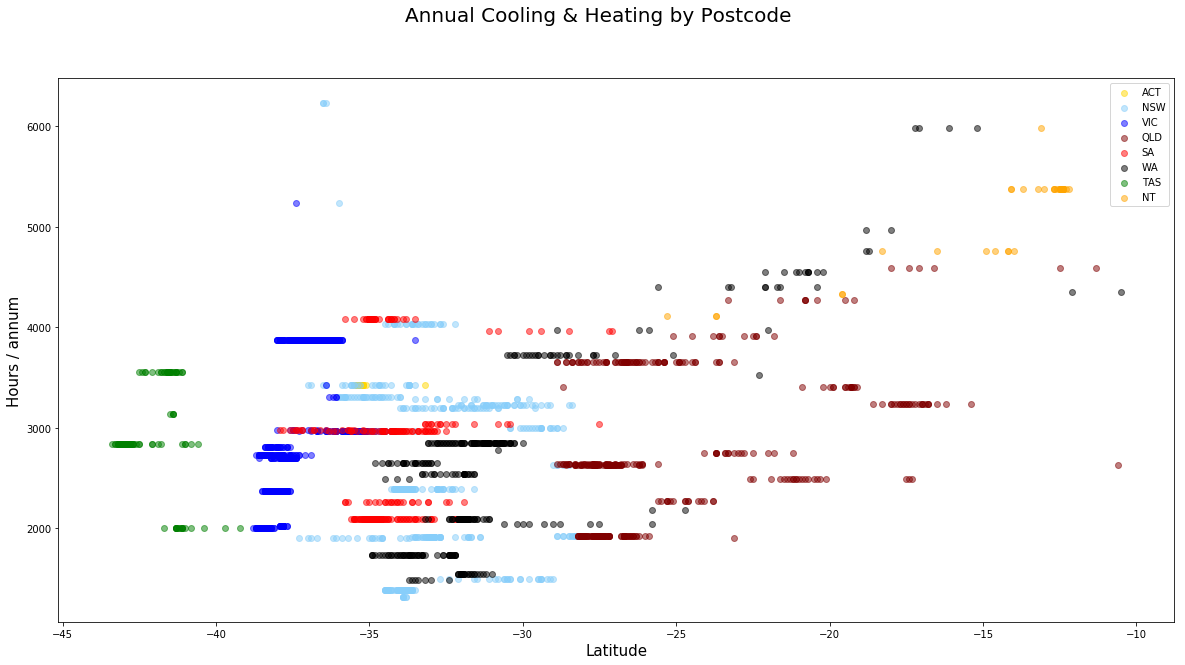

In [29]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
fig.suptitle("Annual Cooling & Heating by Postcode", fontsize = 20)
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], label = state, alpha = 0.5)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)

plt.legend(loc='upper right');
plt.show()

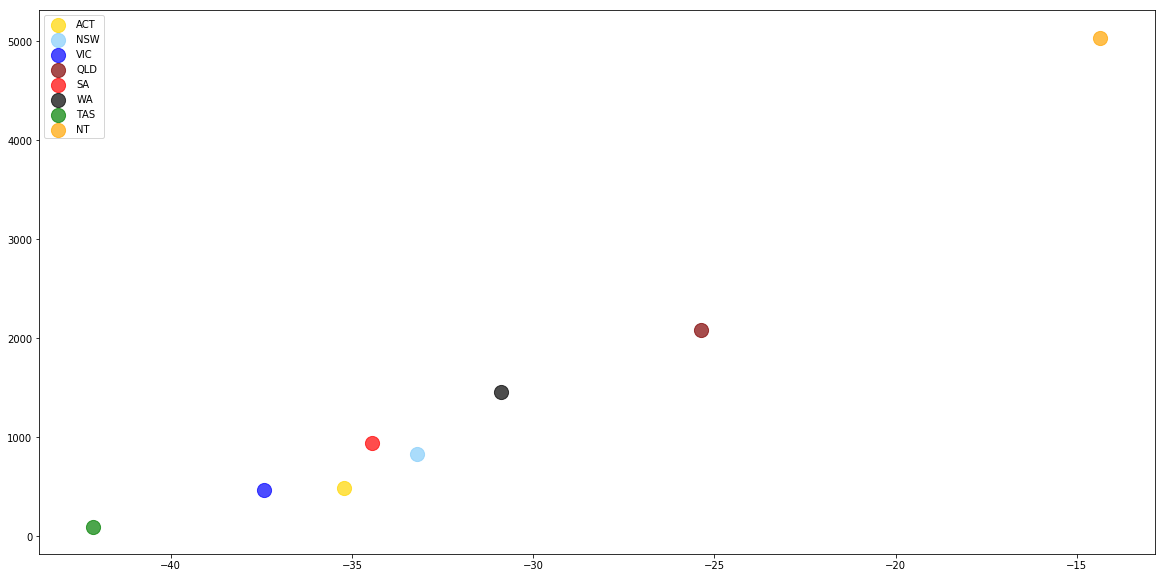

In [30]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),
               label = state, color=stateC[state], s = 200, alpha = 0.7)
plt.legend(loc='upper left');

plt.show()

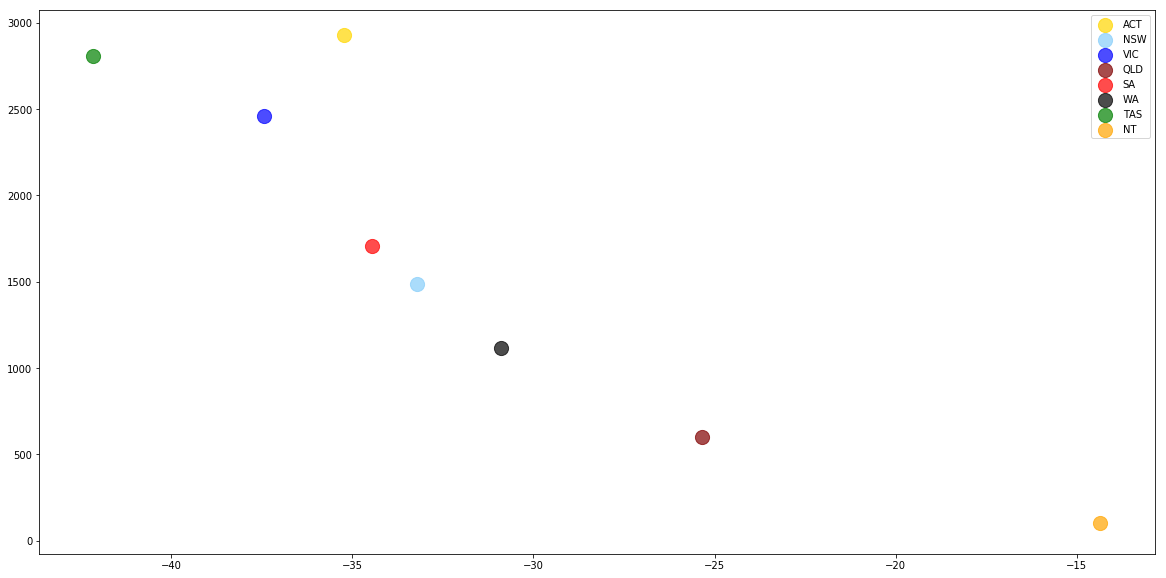

In [31]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper right');
plt.show()

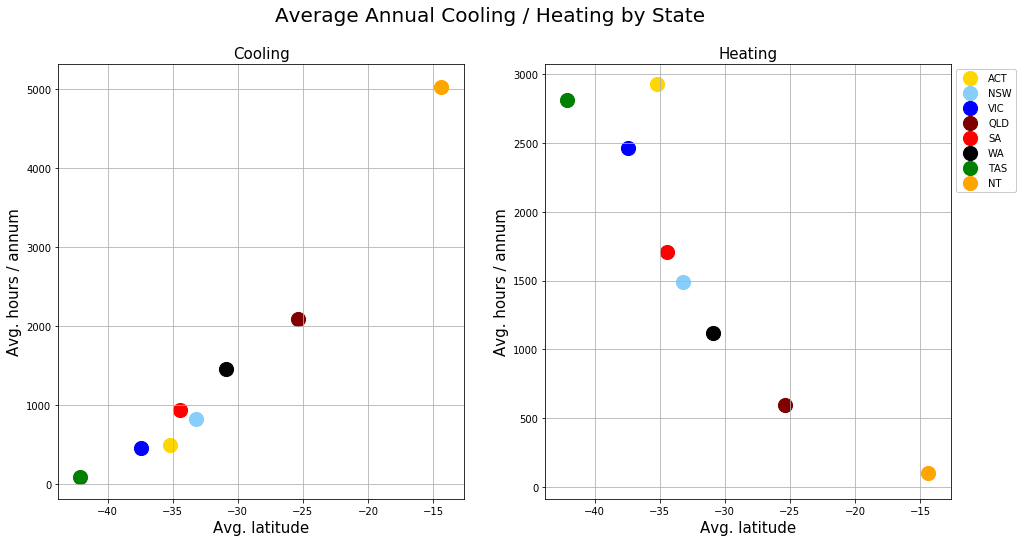

In [32]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Average Annual Cooling / Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
       ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

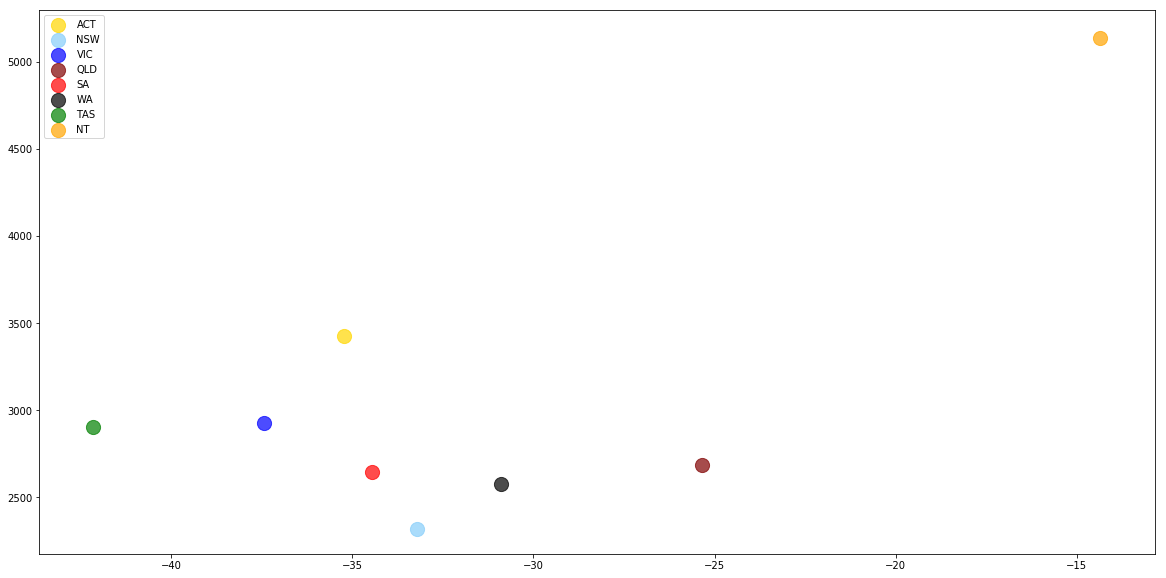

In [33]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper left');
plt.show()

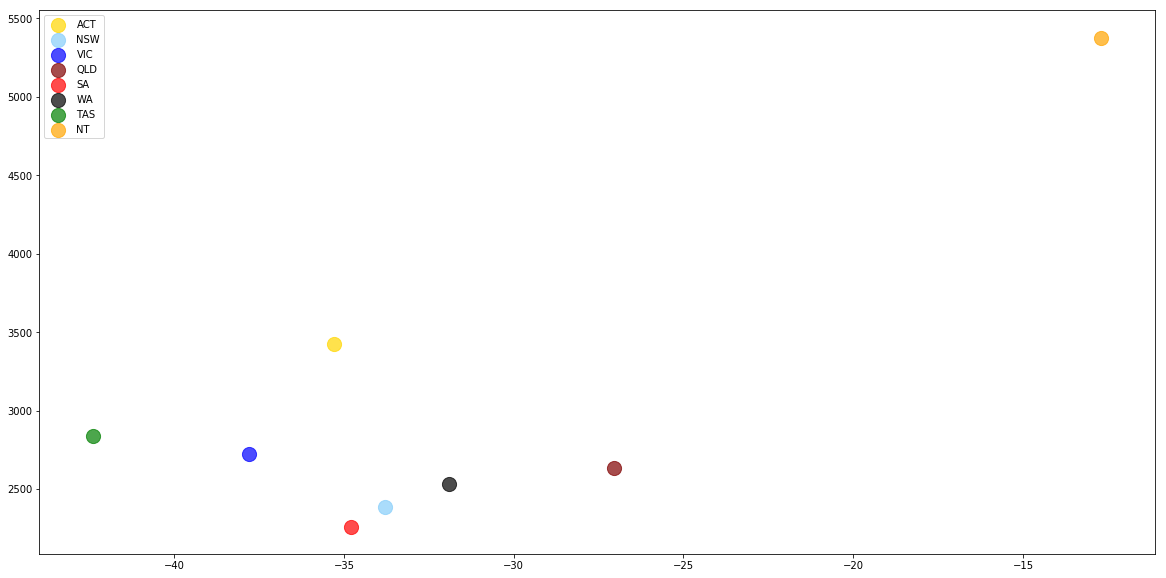

In [34]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper left');
plt.show()

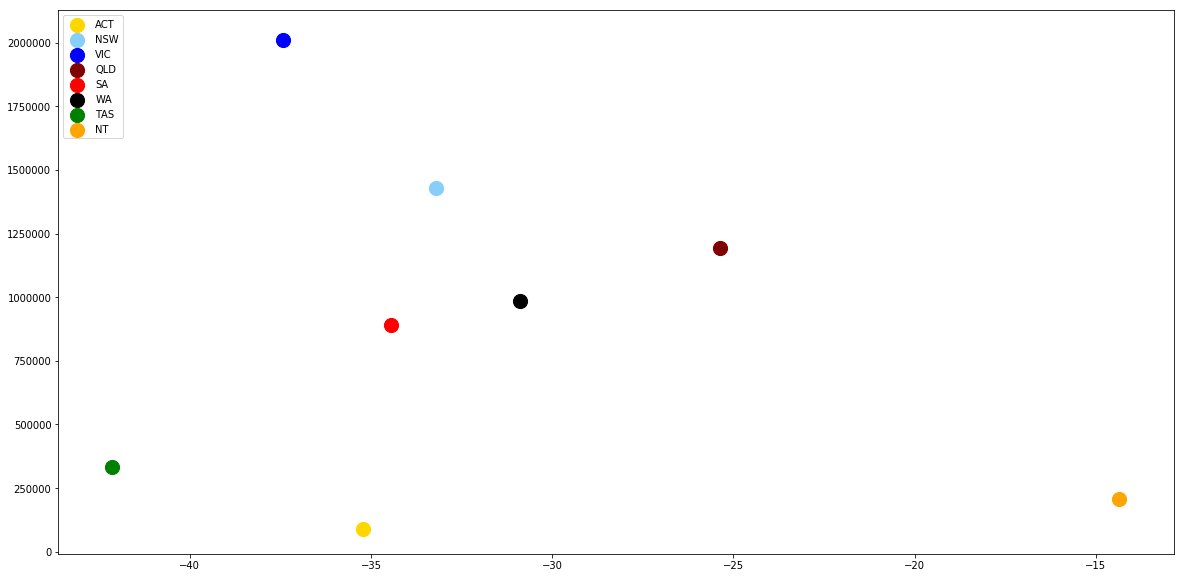

In [35]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
plt.legend(loc='upper left');
plt.show()

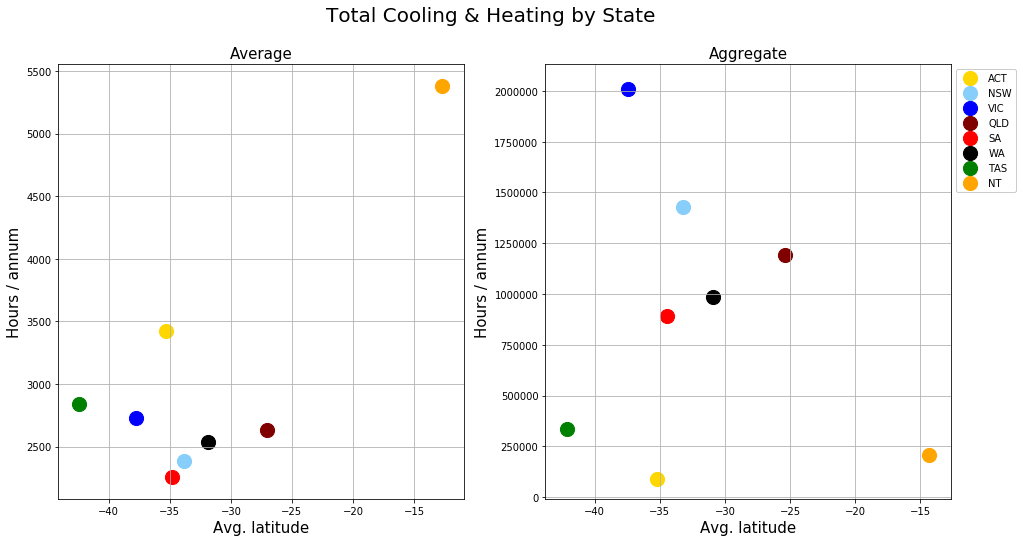

In [36]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

In [37]:
# if os.path.isfile("poaDwellings.xlsx"):
#     PDfilepath = "poaDwellings.xlsx"
#     print "loading from file"

# dwelldf = pd.read_excel(PDfilepath)
# print type(dwelldf)
# print "done"


In [38]:
if os.path.isfile("poaDwellings2.csv"):
    PDfilepath = "poaDwellings2.csv"
    print "loading from file"

dwelldf = pd.read_csv(PDfilepath)
print type(dwelldf)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [39]:
dwelldf.head()

,POA,Occupied private dwellings
0,"2000, NSW",10932.0
1,"2006, NSW",21.0
2,"2007, NSW",3290.0
3,"2008, NSW",2894.0
4,"2009, NSW",5654.0


In [40]:
dwelldf["Postcode"] = dwelldf["POA"].astype(str).str[:4]
# dwelldf["Postcode"] = int(dwelldf["Postcode"])

In [41]:
print airdf.iloc[2008]
print dwelldf.loc[2008]

Postcode                 5142
Longitude               138.7
Latitude                  -35
NatHERS Climate zone       59
Annual cooling hours      360
Annual heating hours     3721
State                      SA
State colour                r
Name: 2008, dtype: object
POA                           5960, SA
Occupied private dwellings          11
Postcode                          5960
Name: 2008, dtype: object


In [42]:
# dwellpc = pd.to_numeric(dwelldf["Postcode"], errors='coerce')
# airpc = pd.to_numeric(airdf["Postcode"], errors='coerce')
# works = 0
# dontworks = 0

# for i  in airpc:
#     for j in dwellpc:
#         if airpc.loc[i] == dwellpc.loc[j]:
#             works += 1
#         else:
#             dontworks += 1
# print works
# print dontworks

In [43]:
print pd.to_numeric(airdf["Postcode"]).loc[1]
print type(dwelldf["Postcode"].loc[1])
print type(airdf["Postcode"].loc[1])
# airdf["Postcode"].loc[1] == pd.to_numeric(dwelldf["Postcode"].loc[1])

801
<type 'str'>
<type 'numpy.int64'>


In [44]:
dwelldf["Postcode"] = pd.to_numeric(dwelldf["Postcode"], errors='coerce')

In [45]:
dummy = pd.to_numeric(dwelldf["Postcode"][1], errors='coerce')
print type(dummy)

<type 'numpy.float64'>


In [46]:
dwelldf[dwelldf["Postcode"]==800]
dwelldf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 3 columns):
POA                           2517 non-null object
Occupied private dwellings    2516 non-null float64
Postcode                      2513 non-null float64
dtypes: float64(2), object(1)
memory usage: 59.1+ KB


In [47]:
# pd.merge(airdf, dwelldf, on = "Postcode")

In [48]:
airdf = airdf.merge(dwelldf, how="inner", on='Postcode')

In [49]:
airdf.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0


In [50]:
print type(airdf["Occupied private dwellings"].loc[1])

<type 'numpy.float64'>


In [51]:
airdf.head()
airdf["agHeating"] = airdf["Occupied private dwellings"] * airdf["Annual heating hours"]
airdf["agCooling"] = airdf["Occupied private dwellings"] * airdf["Annual cooling hours"]
airdf.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0


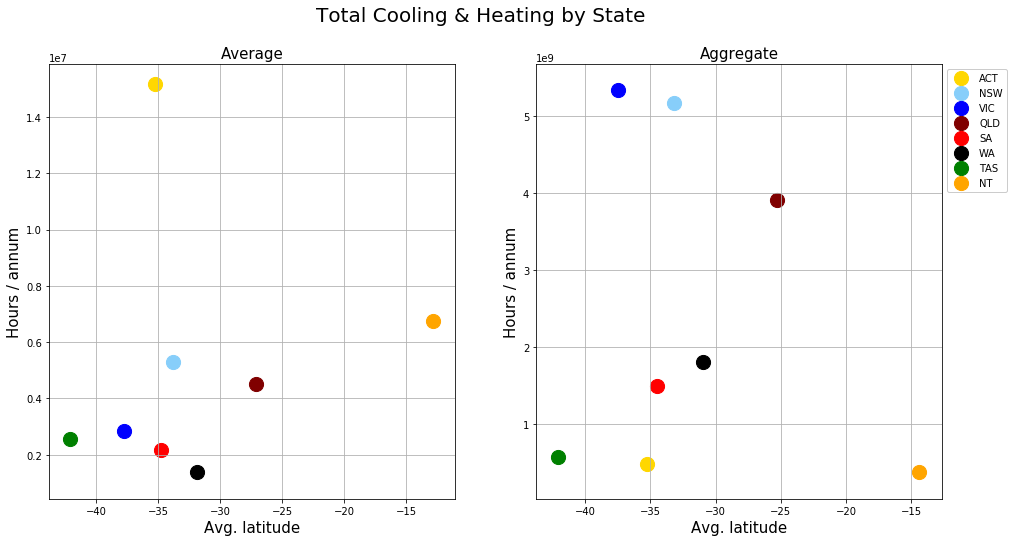

In [52]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["agHeating"] + airdf["agCooling"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

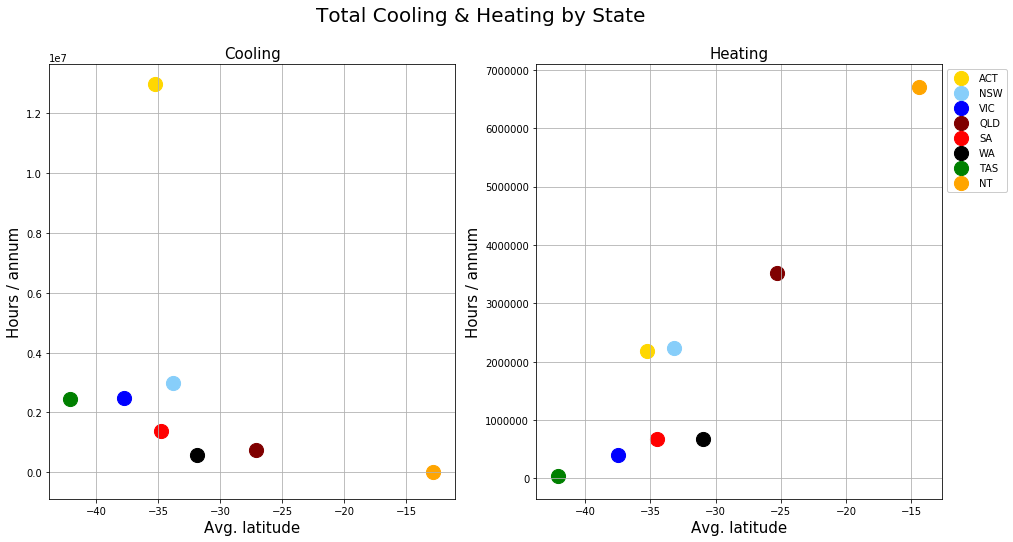

In [53]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yh =  airdf["agCooling"]
yc = airdf["agHeating"] 
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.median(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

In [54]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200, alpha = 0.7)
# avgx = []
# avgy = []
# for state in states:
#     avgx.append(np.mean(x[state_vector==state])
#     avgy.append(np.mean(y[state_vector==state])
# plt.plot(avgx, avgy)
# # plt.plot( x = (for state in states: np.mean(x[state_vector==state])),
# #          y = (for state in states: np.mean(y[state_vector==state]) )
# plt.legend(loc='upper left');
# plt.show()

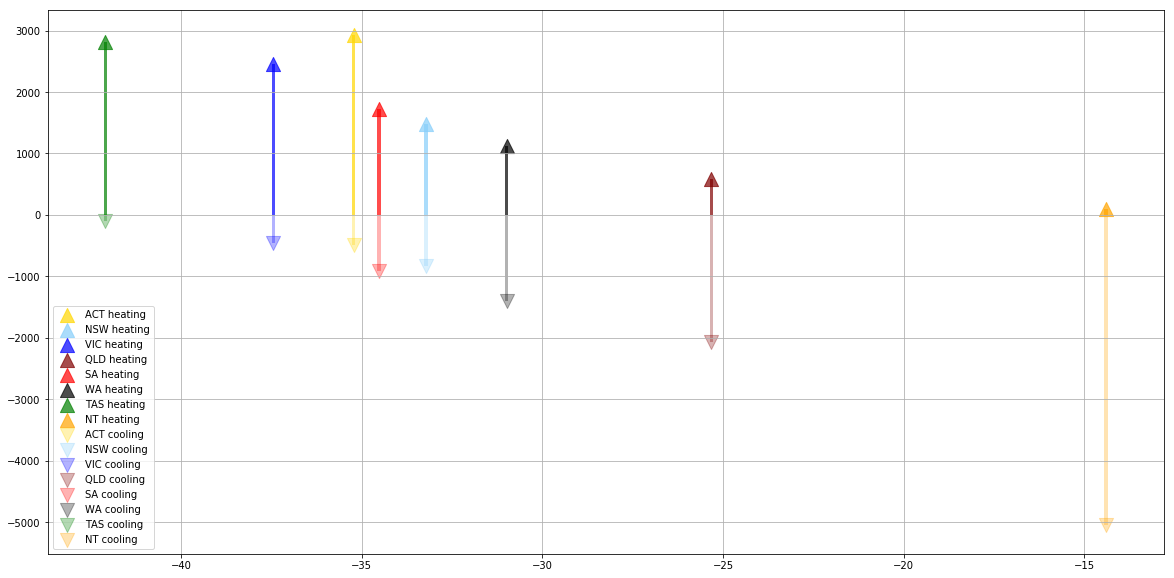

In [55]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state], 
               label = state + " heating", marker ="^",  s = 200, alpha = 0.7)
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.7)
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state])*-1,color=stateC[state], 
               label = state + " cooling", marker = "v",   s = 200, alpha = 0.3)
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.3)
plt.legend(loc='lower left');
ax.grid(True)
plt.show()

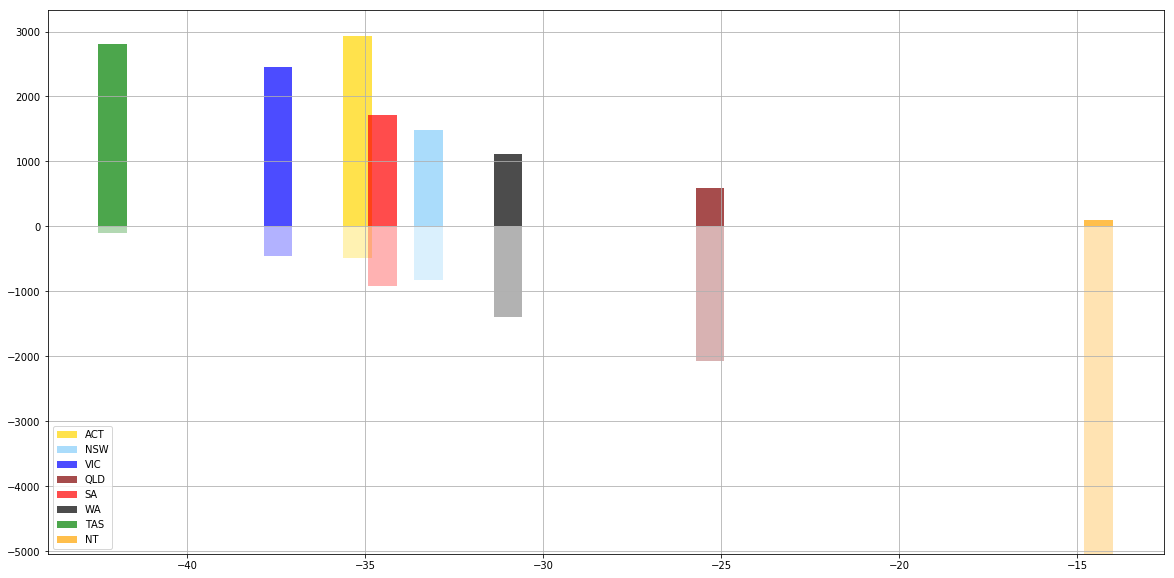

In [56]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
# color = airdf['State colour']
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
# plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

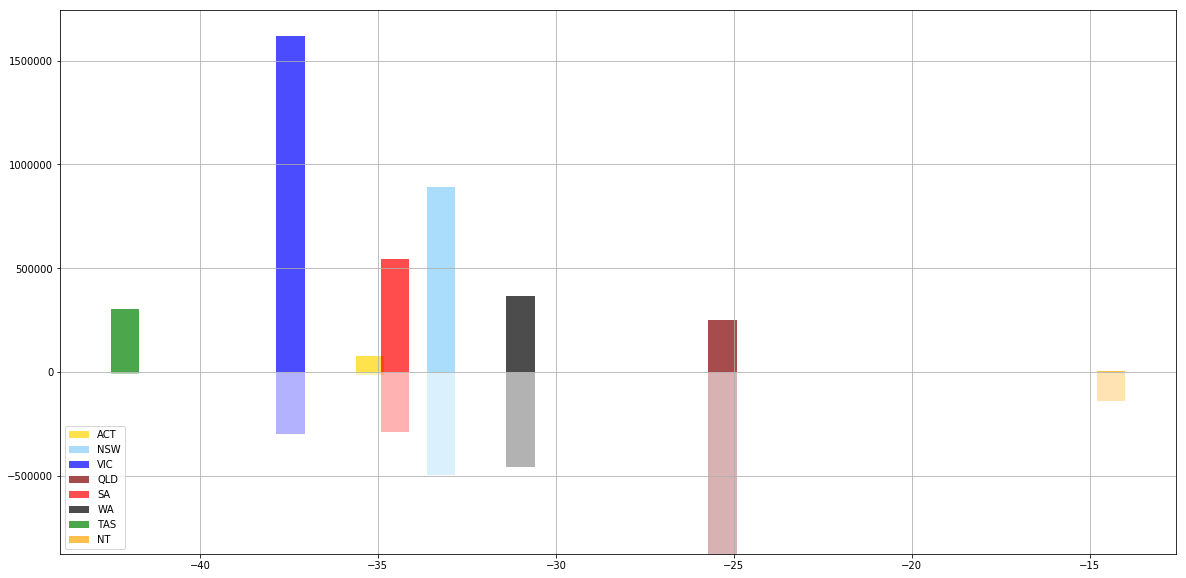

In [57]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
# color = airdf['State colour']
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
# plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

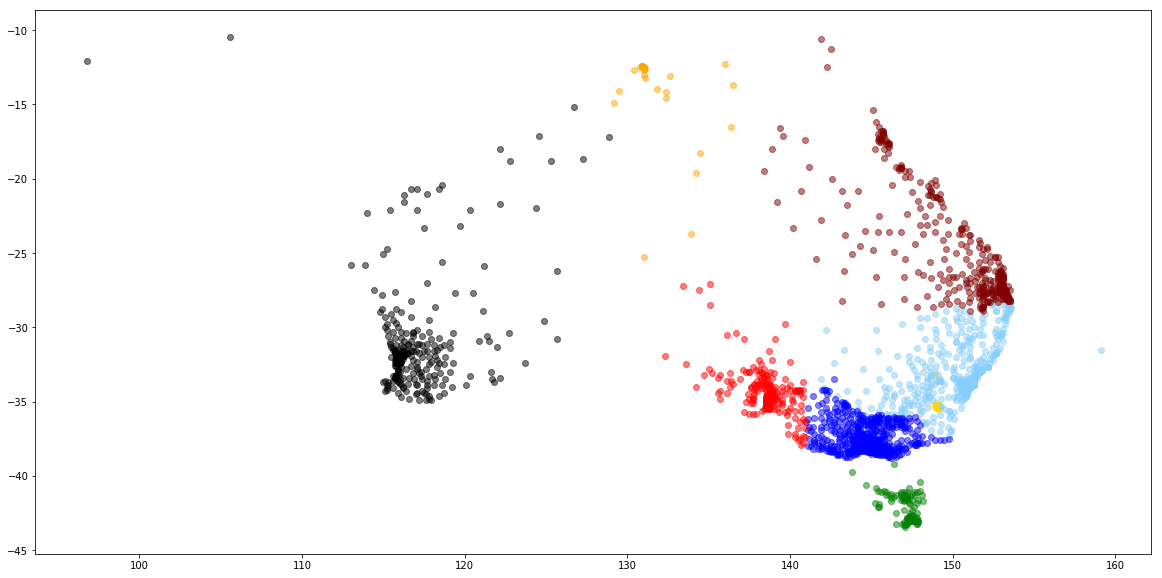

In [58]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)

# ax.grid(True)
plt.show()

In [59]:
"""




Mapping tests bellow




"""

'\n\n\n\n\nMapping tests bellow\n\n\n\n\n'

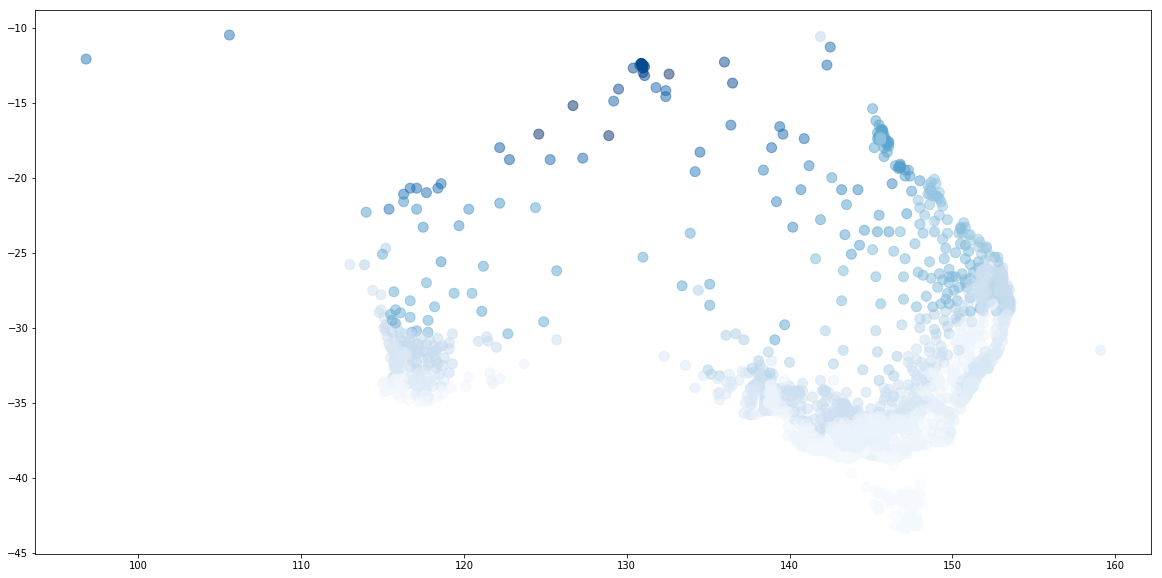

In [60]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"]
c = z
ax.scatter(x,y, c=c, cmap="Blues", s = 100, alpha = 0.5)
plt.show()

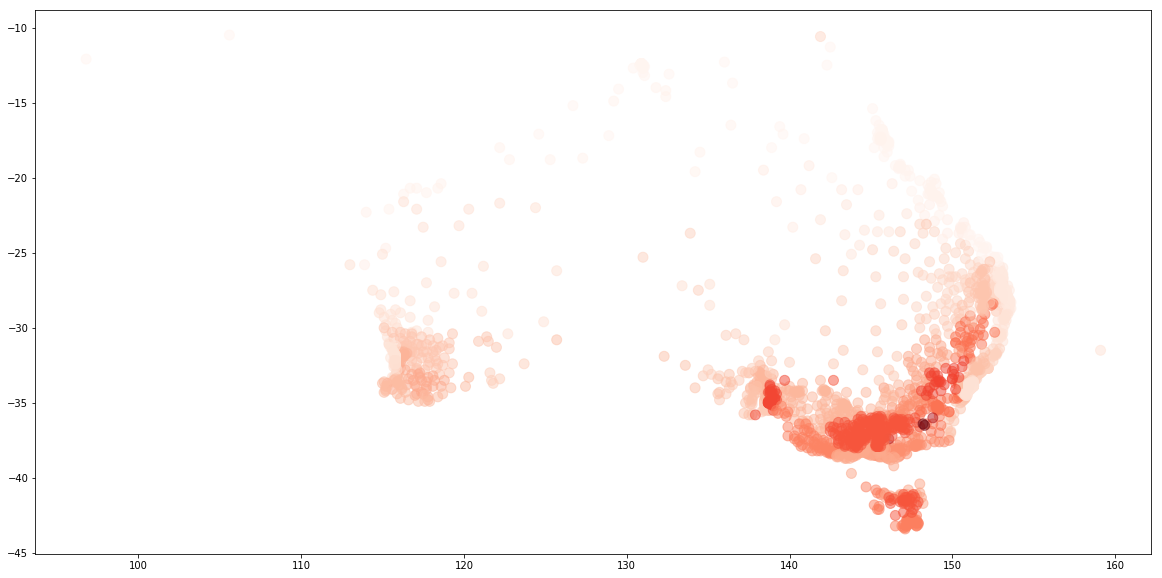

In [61]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]
c = z
ax.scatter(x,y, c=c, cmap="Reds", s = 100, alpha = 0.5)
plt.show()

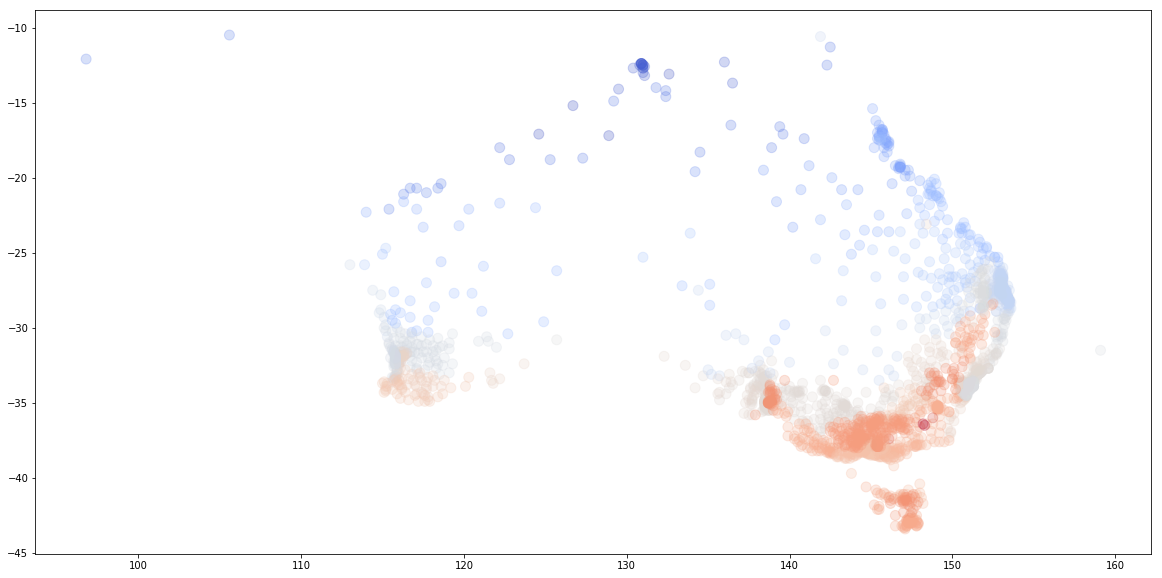

In [62]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
# c = np.abs(z)
c = z
ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)
plt.show()

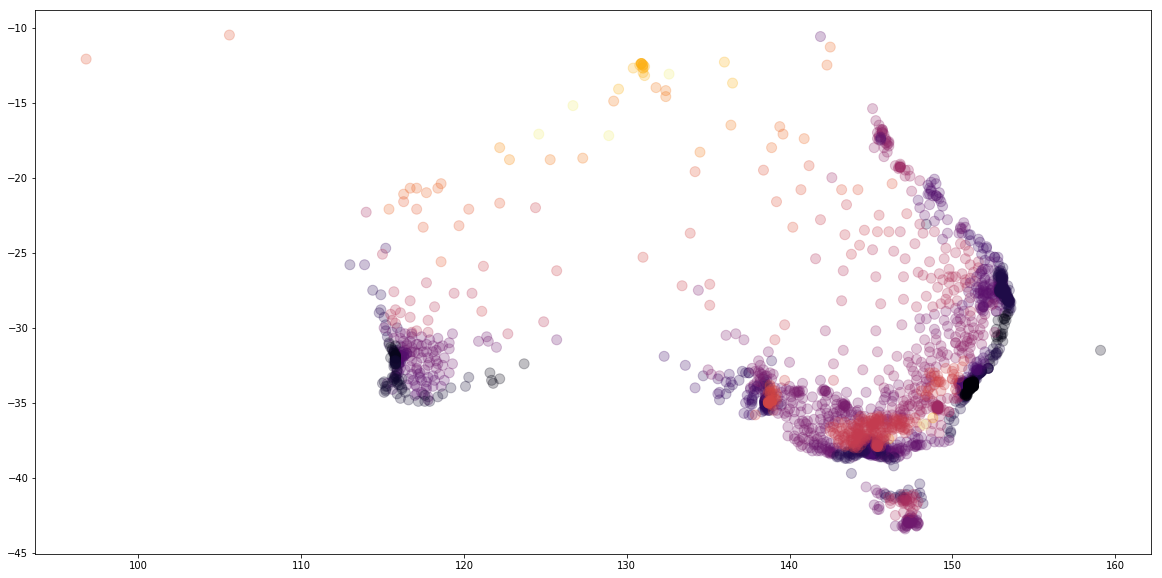

In [63]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
c = np.abs(z)
ax.scatter(x,y, c=z, cmap="inferno", s = 100, alpha = 0.25)
plt.show()

In [64]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()


In [65]:
# pts = [airdf[]]

# heatmap(pts, bins=50, smoothing=1.5)

In [66]:
# heatmap = np.histogram2d(y, x, bins=100, 100)
# # logheatmap = np.log(heatmap)
# # logheatmap[np.isneginf(logheatmap)] = 0
# logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
# plt.imshow(logheatmap, cmap=cmap, extent=extent)

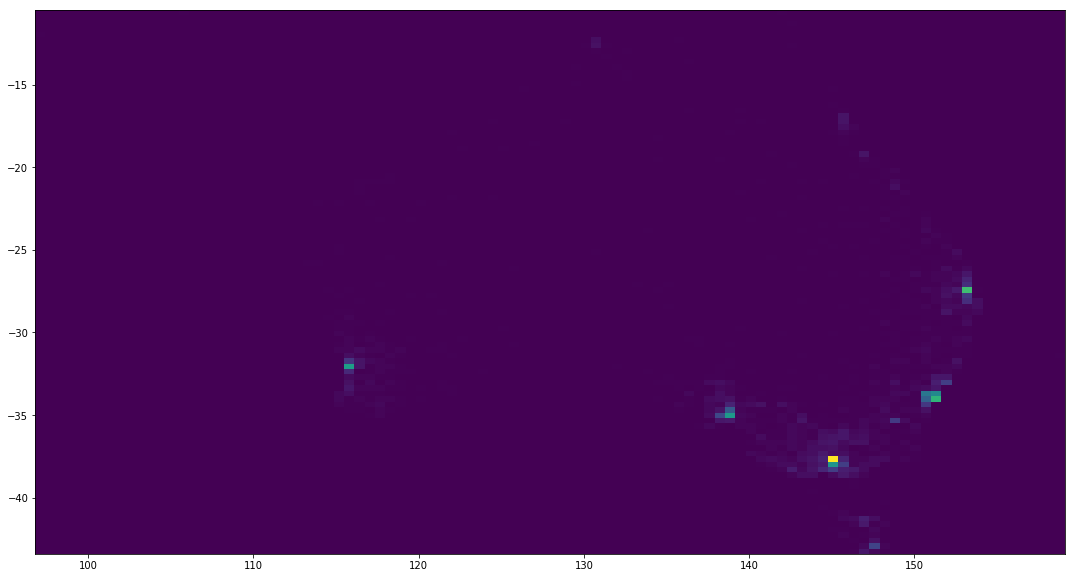

In [67]:

x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

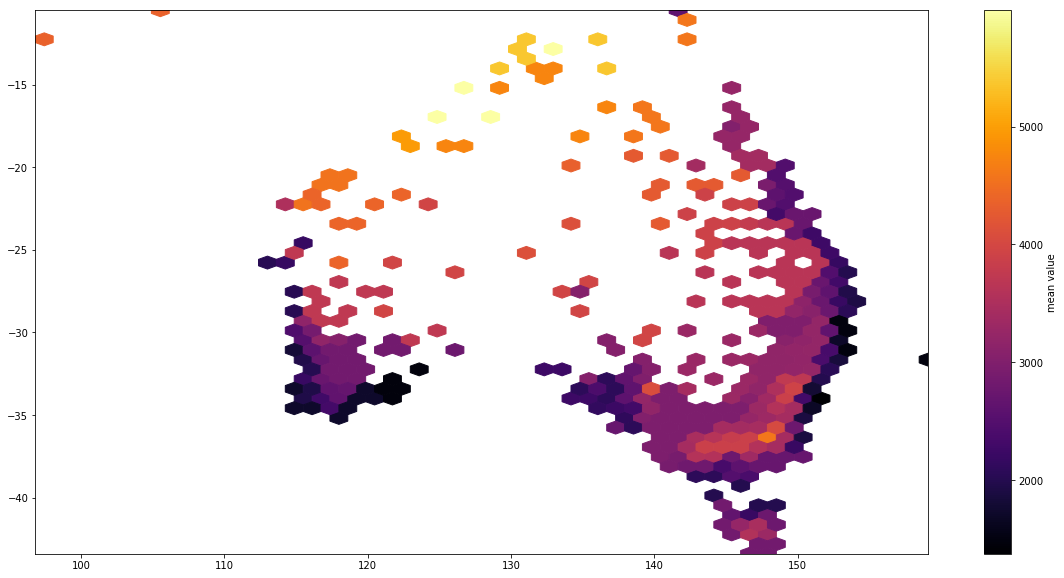

In [68]:
n = 1e5
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 2, 2, 0, 0)
Z2 = mlab.bivariate_normal(X, Y, 4, 1, 1, 1)
ZD = Z2 - Z1
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
gridsize=50
plt.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

plt.hexbin(x, y, C=z, gridsize=gridsize, cmap="inferno", bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

In [70]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()


In [71]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)



poa_shp_file_name = "POA_2016_AUST.shp"
poa_zip_file_name = "1270055003_poa_2016_aust_shape.zip"
poa_web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [72]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(poa_shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(poa_zip_file_name):
        print "unzipping"
        unzip_zipfile(poa_zip_file_name)
    else:
        print "loading from the internet"
        page = requests.get(poa_web_file_path)
        with open(poa_zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(poa_zip_file_name)

print "done"

loading from file
done


In [73]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)



shp_file_name = "aust_cd66states.shp"
zip_file_name = "nsaasr9nnd_02211a04es_geo___.zip"
web_file_path = ("http://data.daff.gov.au/data/warehouse/nsaasr9nnd_022/nsaasr9nnd_02211a04ec_alb132.zip")

In [74]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(zip_file_name):
        print "unzipping"
        unzip_zipfile(zip_file_name)
    else:
        print "loading from the internet"
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print "done"

loading from file
done


In [75]:
poa = gp.GeoDataFrame.from_file(poa_shp_file_name)
poa.head()

,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,0.6381,0815,0815,"POLYGON ((130.872398607 -12.37654838499998, 13..."
4,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."


In [76]:
# mapdf = pd.to_numeric(poa["POA_CODE16"], errors='coerce')
# airpc = pd.to_numeric(airdf["Postcode"], errors='coerce')
# works = 0
# dontworks = 0

# print type(airdf["Postcode"].loc[1])
# print type(poa["POA_CODE16"].loc[1])
# print type(poa["POA_NAME16"].loc[1])
# print type(mapdf.loc[1])
# print type(airpc.loc[1])

# for i  in airpc:
#     for j in mapdf:
#         if airpc.loc[i] == mapdf.loc[j]:
#             works += 1
#         else:
#             dontworks += 1
# print works
# print dontworks

In [77]:
poa["Postcode"] = pd.to_numeric(poa["POA_CODE16"], errors='coerce')

airdf = airdf.merge(poa, how="inner", on='Postcode')

In [78]:
# m = gp.GeoDataFrame.from_file(shp_file_name)
# m.head()

In [79]:
# poa.geometry.plot()

In [80]:
# m.geometry.plot()

In [81]:
# def GeoLookup(df1Poa, df2Poa, df1Geo, df2Geo):
#     for i in df1Poa:
#         if df1Poa[i] == df2Poa[i]:
#            df1Geo = df2Geo[i]
        
def GeoLookup(df1Poa, df2Poa,  df2Geo):
    for i in df1Poa:
        if len(df1Poa) < 4:
            df1Poa = "0"+df1Poa
        if df1Poa == df2Poa:
            return df2Geo
    

In [82]:
airdf.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0,150783.0188,0822,0822,(POLYGON ((130.8775887600001 -12.5574015179999...


In [83]:
# # GeoLookup(aircon_data["Postcode"], poa["POA_CODE16"], aircon_data["geometry"], poa["geometry"])

# # print aircon_data.head()

# print GeoLookup(aircon_data["Postcode"][:5], poa["POA_CODE16"], poa["geometry"])

In [84]:
airdf.geometry(column='Annual cooling hours', cmap='spring')

TypeError: 'Series' object is not callable

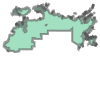

In [88]:
airdf.iloc[4].geometry

In [89]:
airdf.apply(lambda x: type(x.geometry), axis=1).value_counts()


<class 'shapely.geometry.polygon.Polygon'>              2139
<class 'shapely.geometry.multipolygon.MultiPolygon'>     347
dtype: int64

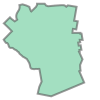

In [90]:
f = [type(x) == shapely.geometry.polygon.Polygon for x in airdf.geometry]
fairdf = airdf[f]

fairdf.geometry[0]

In [91]:
fairdf.geometry.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

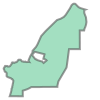

In [86]:
airdf.iloc[1].geometry


In [92]:
shapely.geometry.plot(airdf)

AttributeError: 'module' object has no attribute 'plot'

In [93]:
print type(airdf["geometry"].iloc[1])
airdf["geometry"].iloc[1].plot()

<class 'shapely.geometry.polygon.Polygon'>


AttributeError: 'Polygon' object has no attribute 'plot'

In [94]:
airdf.iloc[1].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
shapely.plot(airdf["geometry"].iloc[1])